In [ ]:
!pip install watermark

In [16]:
%load_ext watermark

In [17]:
%watermark -a "Rishit Kapoor 21BAI1046" -u -d -v -m

Author: Rishit Kapoor 21BAI1046

Last updated: 2024-03-25

Python implementation: CPython
Python version       : 3.10.12
IPython version      : 7.34.0

Compiler    : GCC 11.4.0
OS          : Linux
Release     : 6.1.58+
Machine     : x86_64
Processor   : x86_64
CPU cores   : 2
Architecture: 64bit



In [ ]:
!pip install kaggle

In [4]:
!mkdir ~/.kaggle

In [5]:
!cp kaggle.json ~/.kaggle/

In [6]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download splcher/animefacedataset

In [ ]:
!unzip '/content/animefacedataset.zip' -d '/content/animefacedataset'

In [10]:
path='/content/animefacedataset/images/'

In [12]:
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import glob
from PIL import Image
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data_train_gen =traindata_gen.flow_from_directory(
    directory=path,
    target_size=(224,224),
    batch_size=3,
    class_mode="categorical",
    color_mode='rgb',
    seed = 1234,
    shuffle = True
    )

In [ ]:
all_images = []
for img_path in glob.glob("/content/animefacedataset/images/*"):
    img = Image.open(img_path)
    img = img.resize((224, 224))
    img_array = np.array(img)
    img_array = img_array / 255.0  # divide by 255.0 to get float values between 0 and 1 (Rescale)
    all_images.append(img_array)

In [ ]:
# !pip install -q tensorflow-gpu==2.0.0-rc1
import tensorflow as tf
import matplotlib.pyplot as plt

batch_size = 100
epochs = 10000
z_dim = 20

# Noise for visualization
z_vis = tf.random.normal([10, z_dim])

# Load data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train / 255.0
x_iter = iter(tf.data.Dataset.from_tensor_slices(x_train).shuffle(4 * batch_size).batch(batch_size).repeat())

# Generator
G = tf.keras.models.Sequential([
  tf.keras.layers.Dense(28*28 // 2, input_shape = (z_dim,), activation='relu'),
  tf.keras.layers.Dense(28*28, activation='sigmoid'),
  tf.keras.layers.Reshape((28, 28))])

# Discriminator
D = tf.keras.models.Sequential([
 tf.keras.layers.Flatten(input_shape=(28, 28)),
 tf.keras.layers.Dense(28*28 // 2, activation='relu'),
 tf.keras.layers.Dense(1)])

# Loss functions
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits = True)
def G_loss(D, x_fake):
  return cross_entropy(tf.ones_like(D(x_fake)), D(x_fake))
def D_loss(D, x_real, x_fake):
  return cross_entropy(tf.ones_like(D(x_real)), D(x_real)) + cross_entropy(tf.zeros_like(D(x_fake)), D(x_fake))

# Optimizers
G_opt = tf.keras.optimizers.Adam(1e-4)
D_opt = tf.keras.optimizers.Adam(1e-4)

# Train
for epoch in range(epochs):
  z_mb = tf.random.normal([batch_size, z_dim])
  x_real = next(x_iter)
  # Record operations
  with tf.GradientTape() as G_tape, tf.GradientTape() as D_tape:
    x_fake = G(z_mb)
    G_loss_curr = G_loss(D, x_fake)
    D_loss_curr = D_loss(D, x_real, x_fake)
  # Gradients
  G_grad = G_tape.gradient(G_loss_curr, G.trainable_variables)
  D_grad = D_tape.gradient(D_loss_curr, D.trainable_variables)
  # Apply gradients
  G_opt.apply_gradients(zip(G_grad, G.trainable_variables))
  D_opt.apply_gradients(zip(D_grad, D.trainable_variables))

  if epoch % 100 == 0:
    # Print results
    print('epoch: {}; G_loss: {:.6f}; D_loss: {:.6f}'.format(epoch+1, G_loss_curr, D_loss_curr))
    # Plot generated images
    for i in range(10):
      plt.subplot(2, 5, i+1)
      plt.imshow(G(z_vis)[i,:,:]*255.0)
      plt.axis('off')
    plt.show()

In [13]:
# !pip install -q tensorflow-gpu==2.0.0-rc1
import tensorflow as tf
import matplotlib.pyplot as plt
import os

# Set dataset path
dataset_path = '/content/animefacedataset/images/'

batch_size = 100
epochs = 10000
z_dim = 20

# Noise for visualization
z_vis = tf.random.normal([10, z_dim])

# Load data
def load_images(dataset_path):
    images = []
    for filename in os.listdir(dataset_path):
        img = tf.keras.preprocessing.image.load_img(os.path.join(dataset_path, filename), target_size=(28, 28))
        img = tf.keras.preprocessing.image.img_to_array(img)
        img = tf.image.rgb_to_grayscale(img)  # Convert image to grayscale
        images.append(img)
    return tf.convert_to_tensor(images)


epoch: 1; G_loss: 0.649117; D_loss: 1.380351


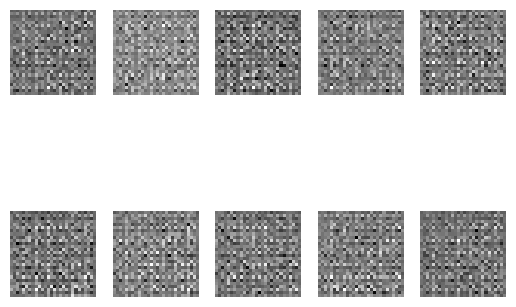

epoch: 101; G_loss: 1.113708; D_loss: 0.700046


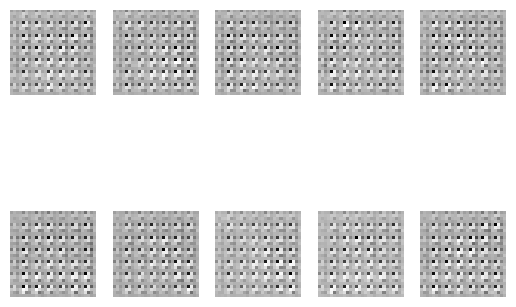

epoch: 201; G_loss: 1.682292; D_loss: 0.368402


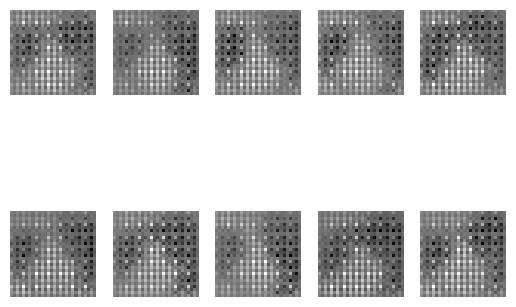

epoch: 301; G_loss: 2.491475; D_loss: 0.184271


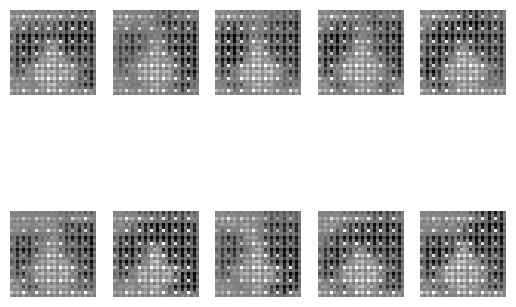

epoch: 401; G_loss: 3.357069; D_loss: 0.112761


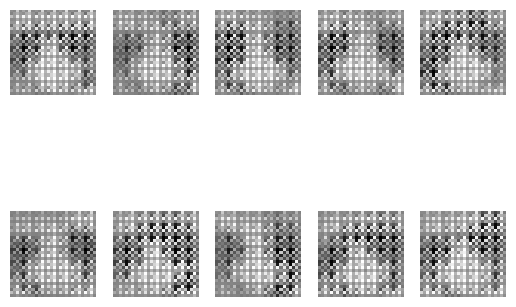

epoch: 501; G_loss: 2.360044; D_loss: 0.284908


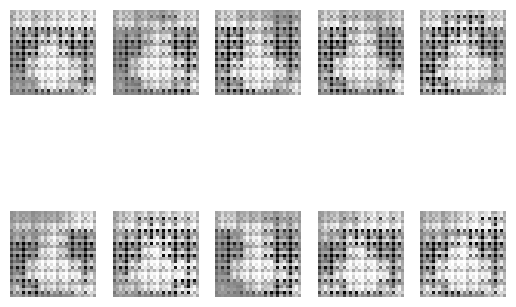

epoch: 601; G_loss: 2.576855; D_loss: 0.372089


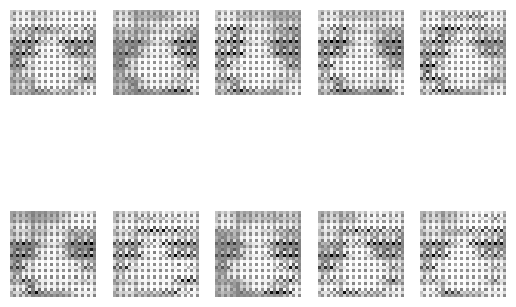

epoch: 701; G_loss: 2.893212; D_loss: 0.204469


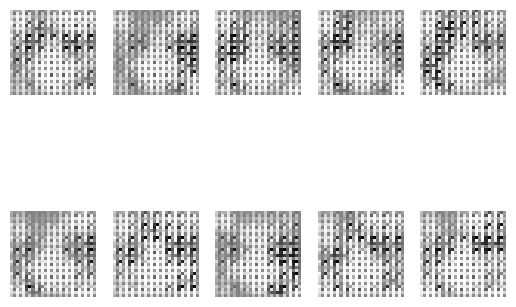

epoch: 801; G_loss: 1.794124; D_loss: 0.474871


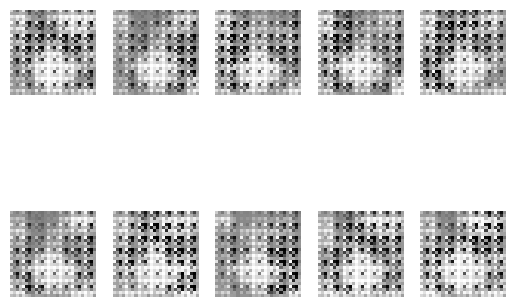

epoch: 901; G_loss: 3.677521; D_loss: 0.079909


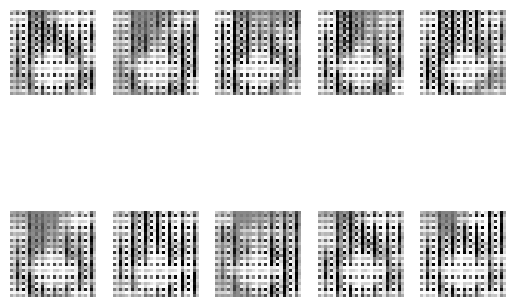

epoch: 1001; G_loss: 3.620052; D_loss: 0.083116


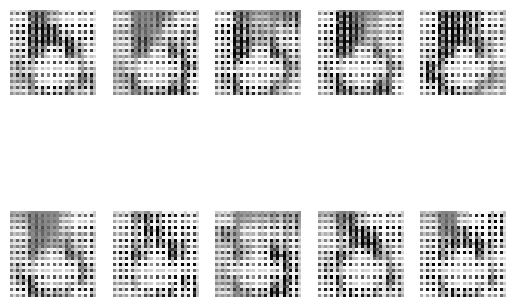

epoch: 1101; G_loss: 2.618466; D_loss: 0.212077


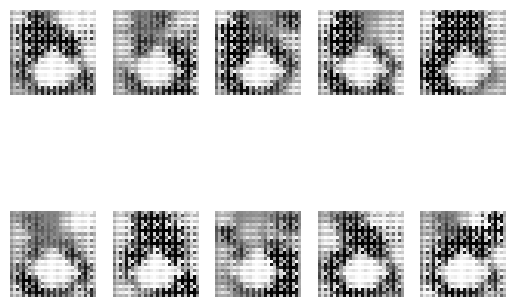

epoch: 1201; G_loss: 1.150427; D_loss: 1.206563


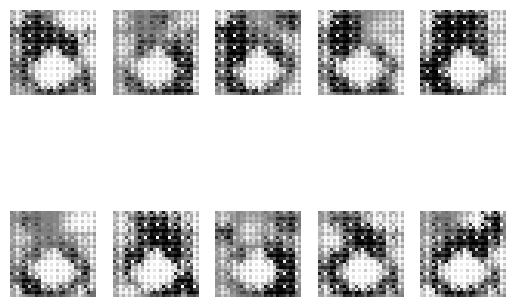

epoch: 1301; G_loss: 2.541948; D_loss: 0.317071


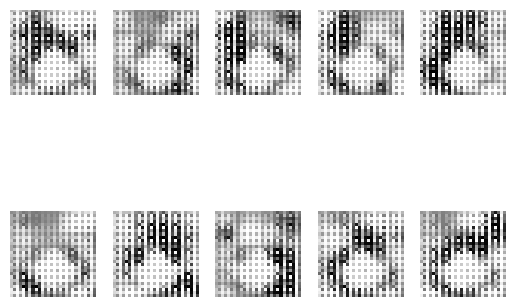

epoch: 1401; G_loss: 2.451696; D_loss: 0.810030


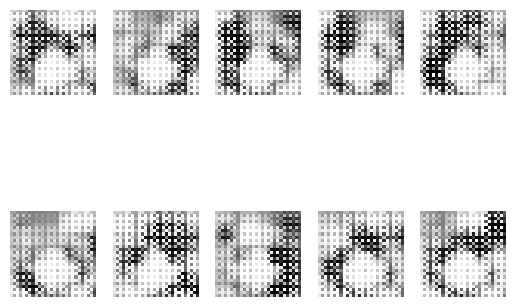

epoch: 1501; G_loss: 3.001830; D_loss: 0.180049


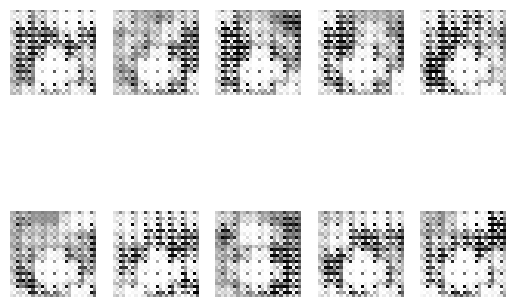

epoch: 1601; G_loss: 1.733786; D_loss: 0.492702


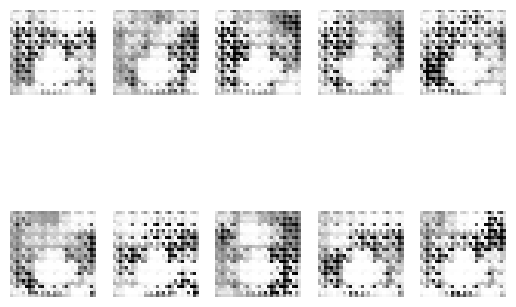

epoch: 1701; G_loss: 1.486598; D_loss: 0.705966


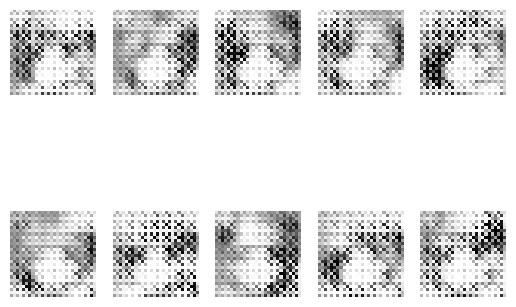

epoch: 1801; G_loss: 2.941158; D_loss: 0.173179


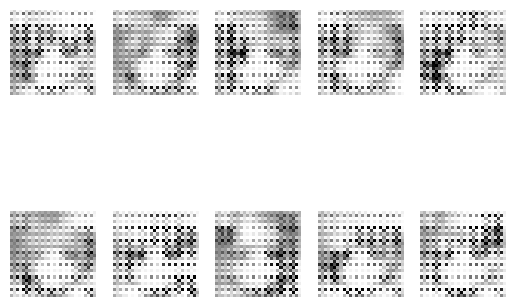

epoch: 1901; G_loss: 2.695037; D_loss: 0.405492


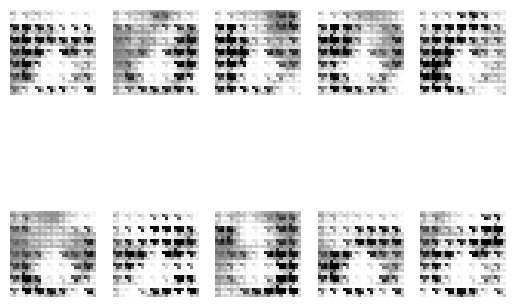

epoch: 2001; G_loss: 2.081929; D_loss: 0.689423


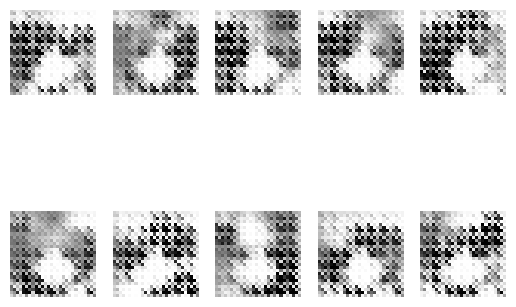

epoch: 2101; G_loss: 2.301608; D_loss: 0.406389


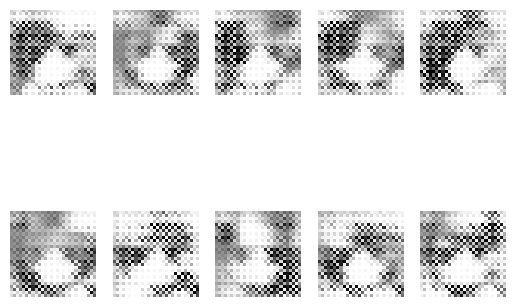

epoch: 2201; G_loss: 2.272911; D_loss: 0.324275


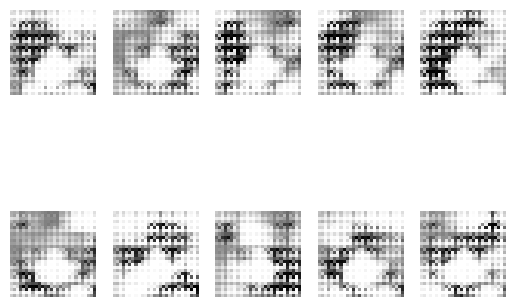

epoch: 2301; G_loss: 2.031693; D_loss: 0.392257


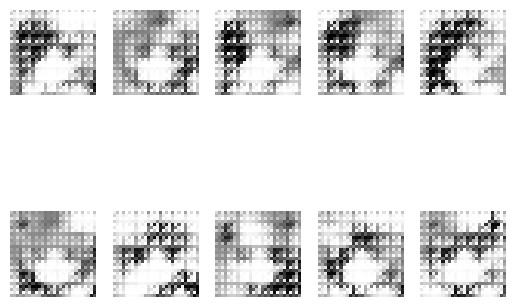

epoch: 2401; G_loss: 2.618286; D_loss: 0.210517


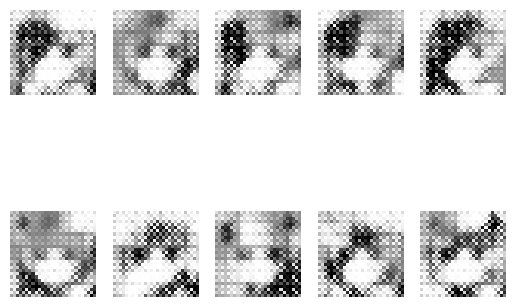

epoch: 2501; G_loss: 1.385178; D_loss: 1.004602


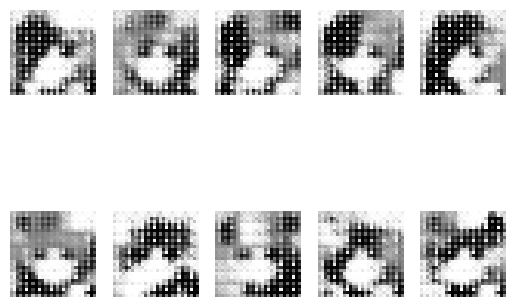

epoch: 2601; G_loss: 3.639909; D_loss: 0.104593


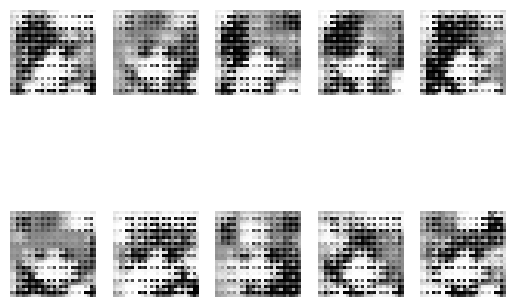

epoch: 2701; G_loss: 1.770267; D_loss: 0.735078


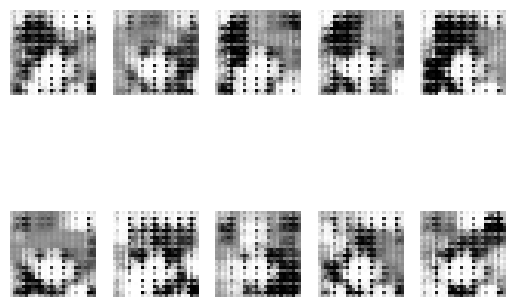

epoch: 2801; G_loss: 0.861261; D_loss: 1.857913


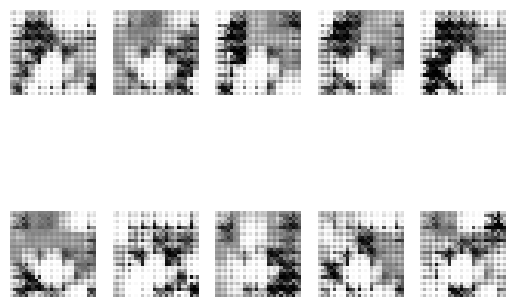

epoch: 2901; G_loss: 1.526975; D_loss: 0.969681


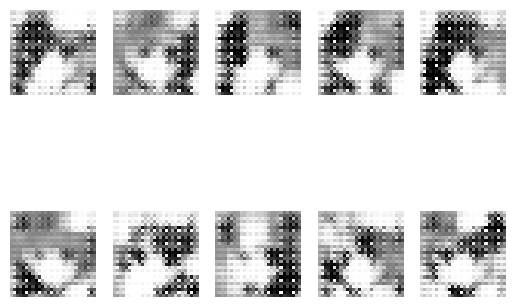

epoch: 3001; G_loss: 1.836905; D_loss: 0.462417


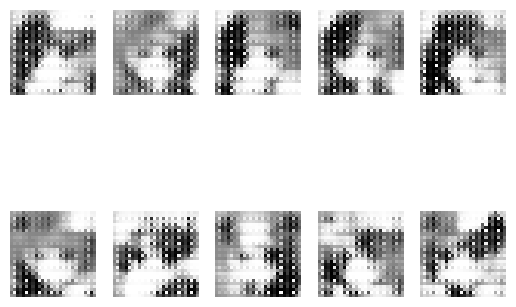

epoch: 3101; G_loss: 1.291494; D_loss: 0.976533


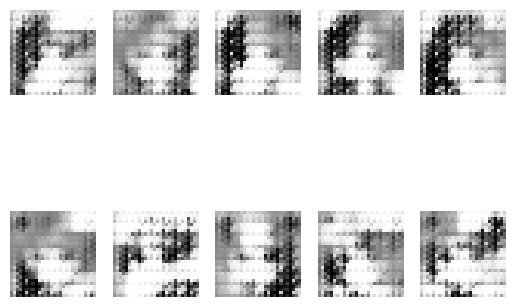

epoch: 3201; G_loss: 1.014412; D_loss: 1.087774


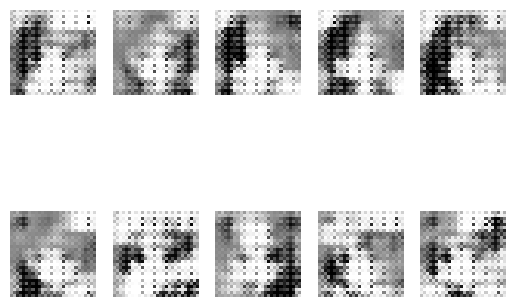

epoch: 3301; G_loss: 1.165655; D_loss: 0.816828


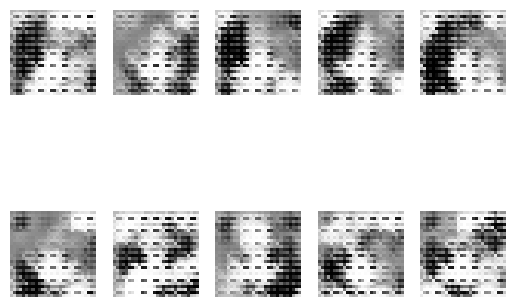

epoch: 3401; G_loss: 1.015369; D_loss: 1.364743


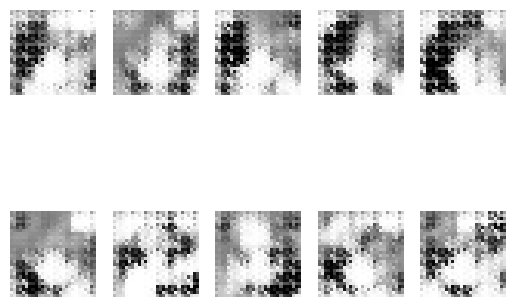

epoch: 3501; G_loss: 1.733227; D_loss: 0.375358


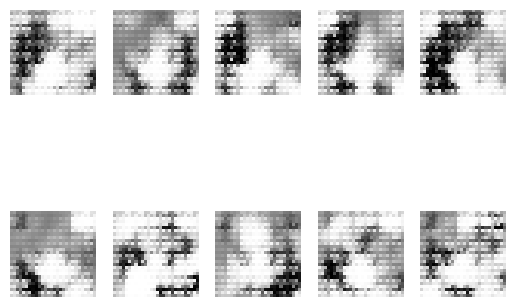

epoch: 3601; G_loss: 1.476465; D_loss: 0.747572


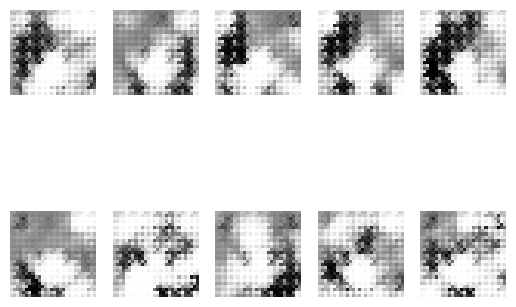

epoch: 3701; G_loss: 1.071520; D_loss: 0.923301


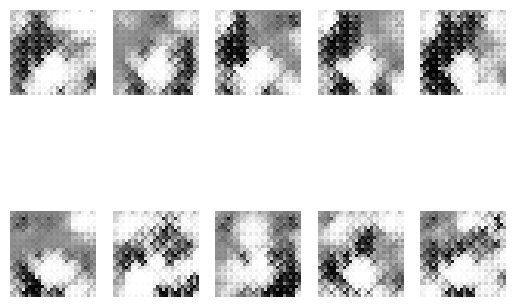

epoch: 3801; G_loss: 1.592633; D_loss: 0.587416


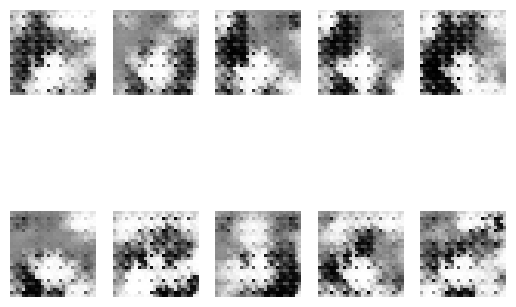

epoch: 3901; G_loss: 1.527316; D_loss: 0.687978


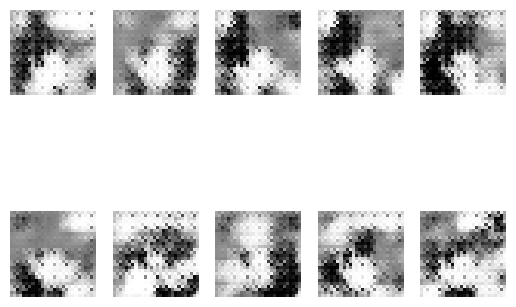

epoch: 4001; G_loss: 0.717898; D_loss: 1.251840


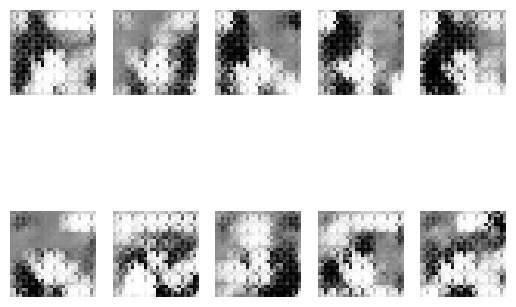

epoch: 4101; G_loss: 1.351020; D_loss: 1.030185


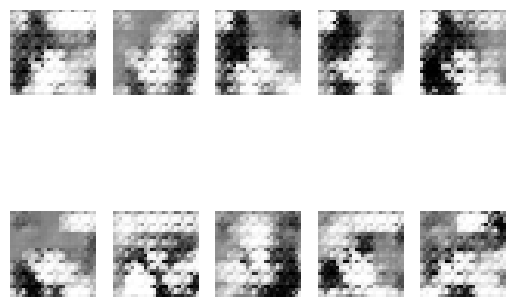

epoch: 4201; G_loss: 1.862594; D_loss: 0.592465


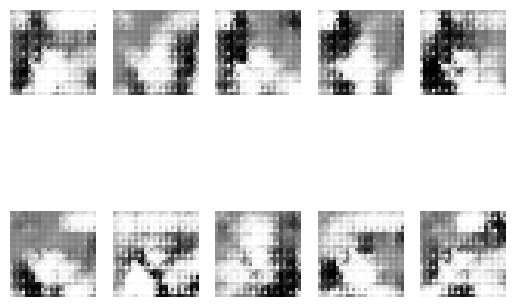

epoch: 4301; G_loss: 0.550313; D_loss: 1.917319


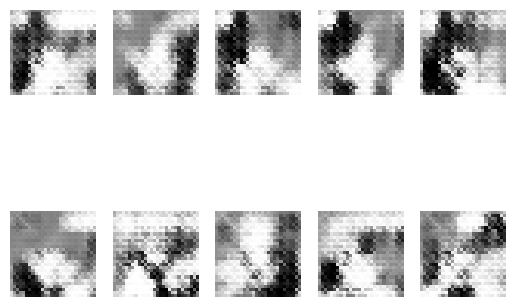

epoch: 4401; G_loss: 1.282677; D_loss: 0.868902


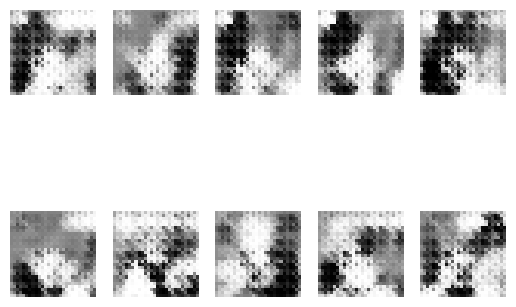

epoch: 4501; G_loss: 1.134043; D_loss: 1.242354


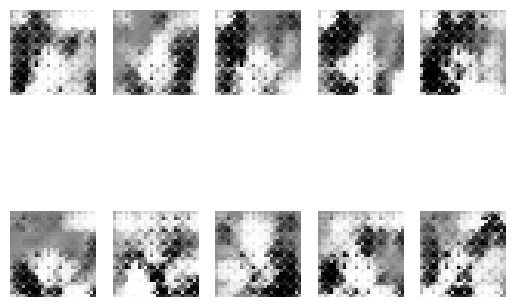

epoch: 4601; G_loss: 0.968809; D_loss: 0.845278


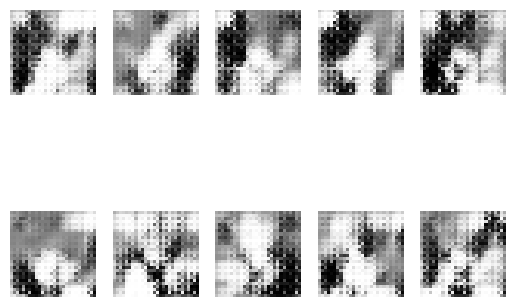

epoch: 4701; G_loss: 1.038078; D_loss: 1.296030


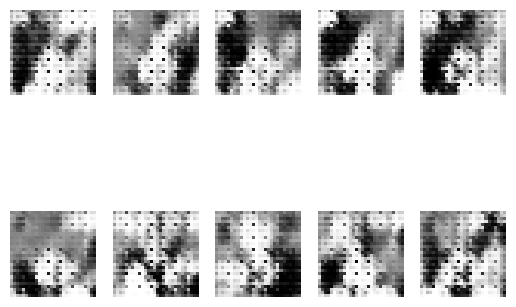

epoch: 4801; G_loss: 1.151250; D_loss: 1.101045


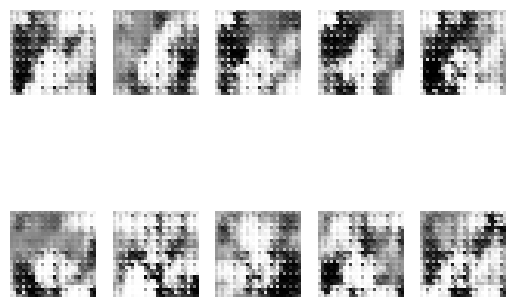

epoch: 4901; G_loss: 0.979946; D_loss: 1.358051


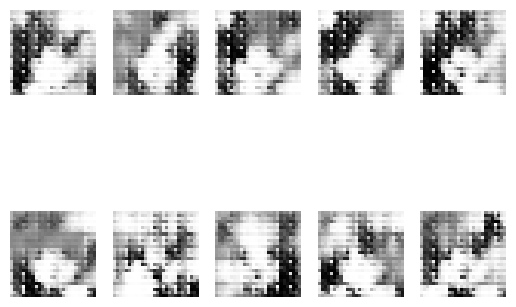

epoch: 5001; G_loss: 0.964993; D_loss: 1.427750


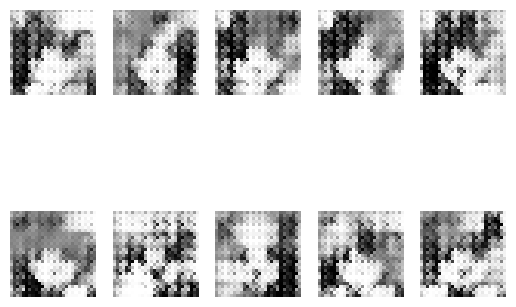

epoch: 5101; G_loss: 0.715095; D_loss: 1.989718


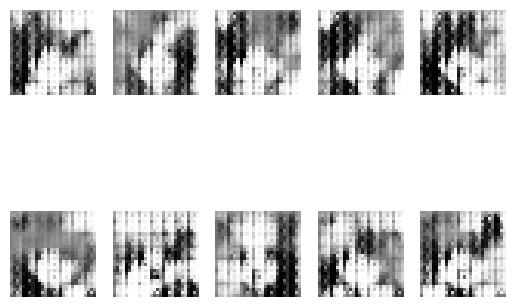

epoch: 5201; G_loss: 1.274994; D_loss: 1.344442


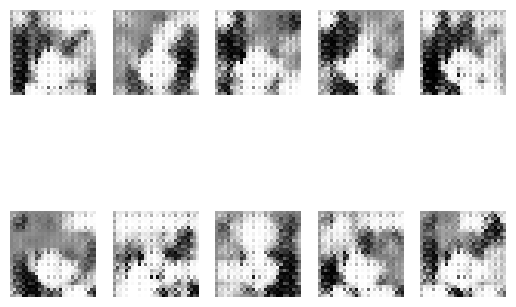

epoch: 5301; G_loss: 1.220025; D_loss: 0.827932


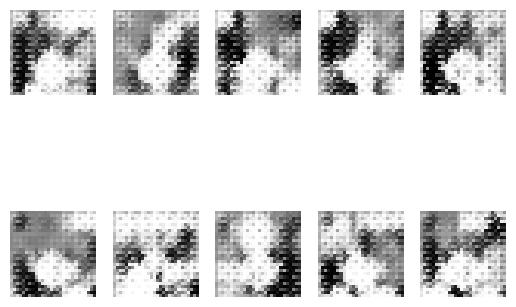

epoch: 5401; G_loss: 1.444745; D_loss: 0.609764


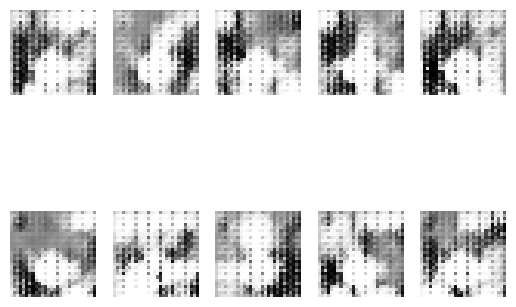

epoch: 5501; G_loss: 1.086505; D_loss: 1.161192


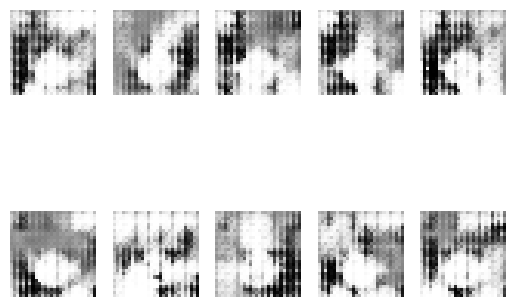

epoch: 5601; G_loss: 1.948717; D_loss: 0.587415


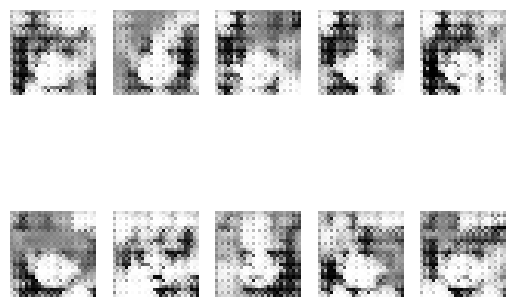

epoch: 5701; G_loss: 0.639584; D_loss: 1.445368


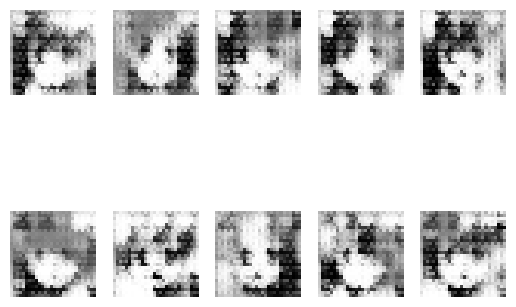

epoch: 5801; G_loss: 0.742377; D_loss: 1.433479


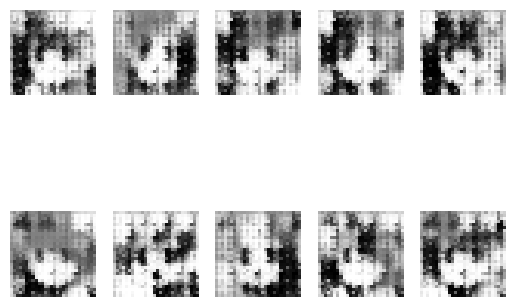

epoch: 5901; G_loss: 1.259762; D_loss: 1.286983


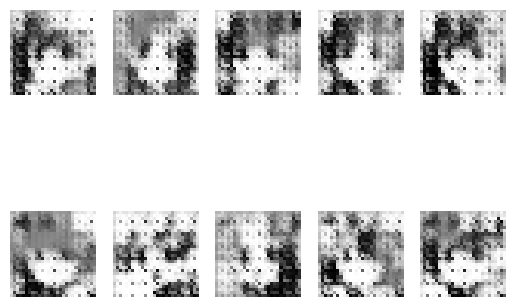

epoch: 6001; G_loss: 1.403343; D_loss: 0.875089


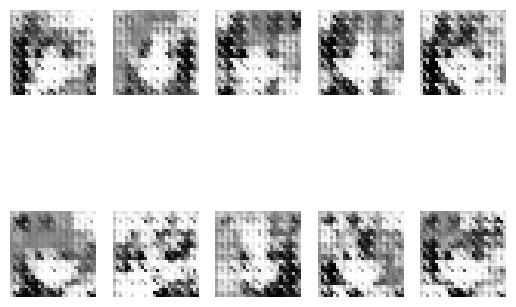

epoch: 6101; G_loss: 1.398350; D_loss: 0.863864


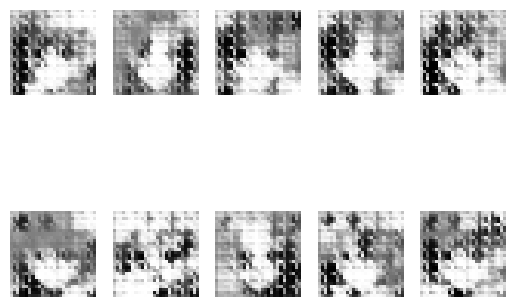

epoch: 6201; G_loss: 1.536402; D_loss: 0.531441


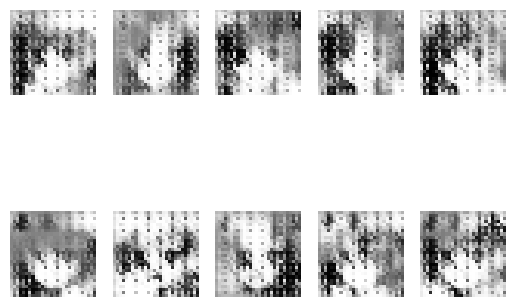

epoch: 6301; G_loss: 1.070479; D_loss: 1.127806


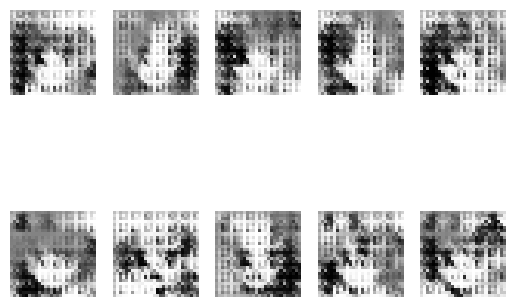

epoch: 6401; G_loss: 0.805531; D_loss: 2.192710


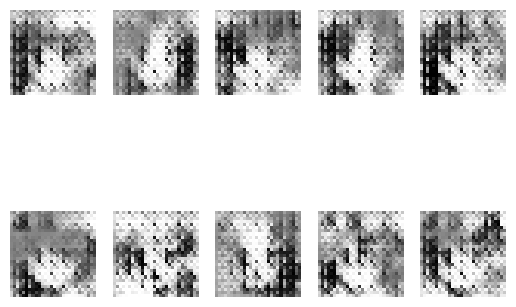

epoch: 6501; G_loss: 1.348853; D_loss: 0.889220


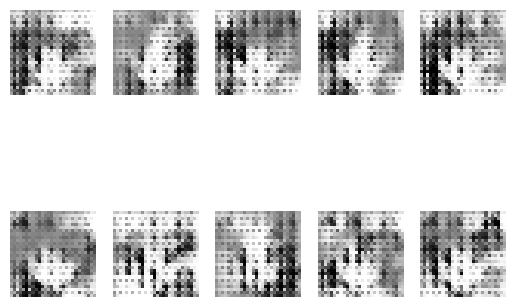

epoch: 6601; G_loss: 1.155299; D_loss: 1.334476


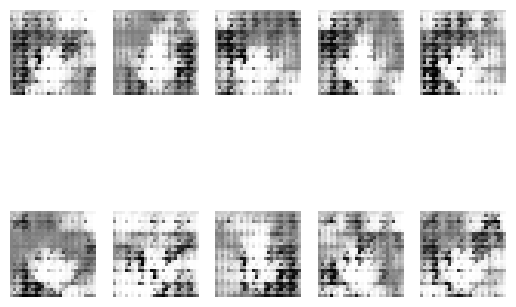

epoch: 6701; G_loss: 1.572517; D_loss: 0.630571


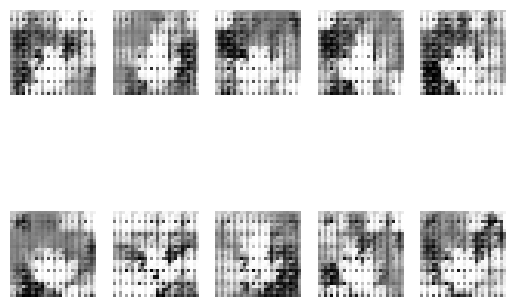

epoch: 6801; G_loss: 1.004066; D_loss: 1.026226


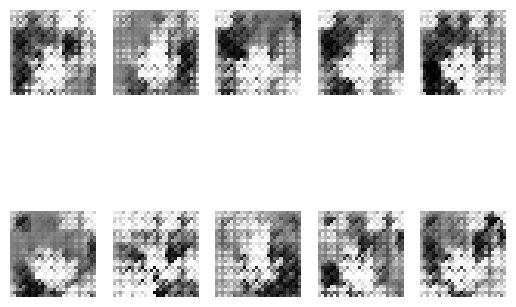

epoch: 6901; G_loss: 0.968800; D_loss: 1.354411


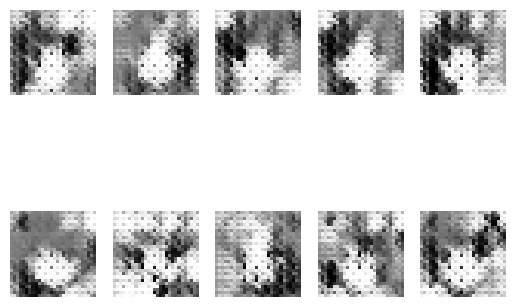

epoch: 7001; G_loss: 0.955048; D_loss: 1.161735


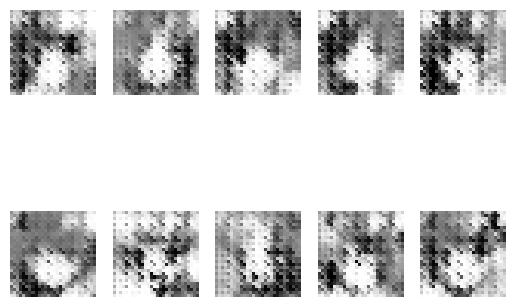

epoch: 7101; G_loss: 1.170512; D_loss: 0.750744


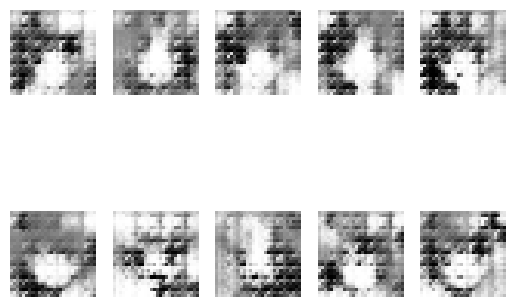

epoch: 7201; G_loss: 0.889944; D_loss: 1.497072


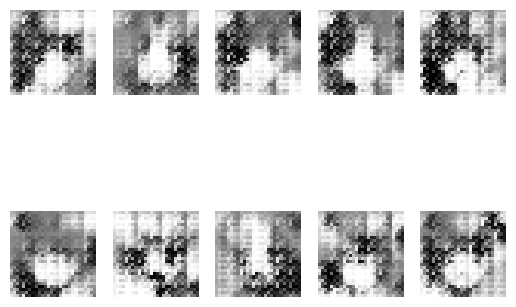

epoch: 7301; G_loss: 1.153603; D_loss: 1.015062


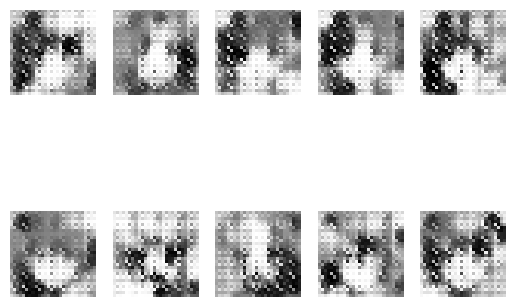

epoch: 7401; G_loss: 1.356614; D_loss: 0.871711


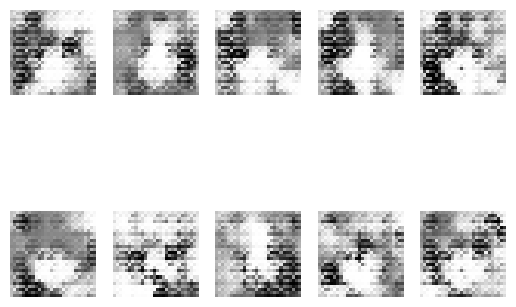

epoch: 7501; G_loss: 0.837144; D_loss: 1.540488


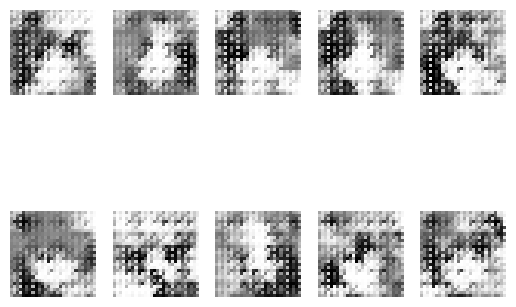

epoch: 7601; G_loss: 1.202864; D_loss: 1.095049


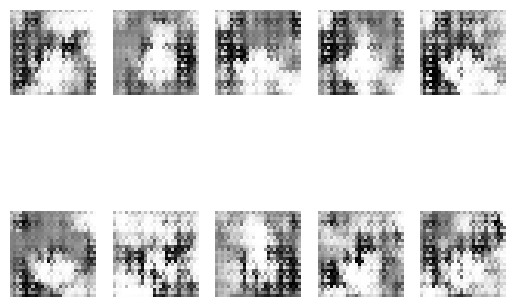

epoch: 7701; G_loss: 1.747219; D_loss: 0.446124


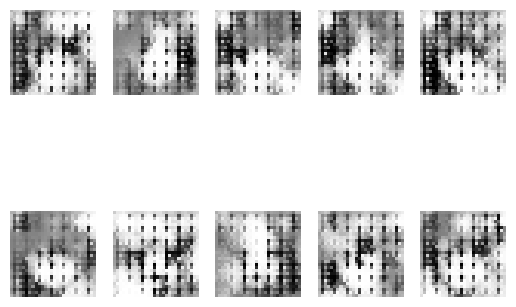

epoch: 7801; G_loss: 1.314444; D_loss: 1.191052


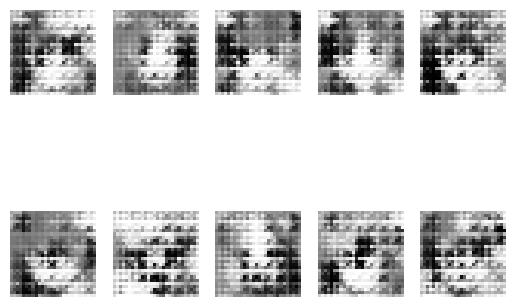

epoch: 7901; G_loss: 0.912701; D_loss: 1.384161


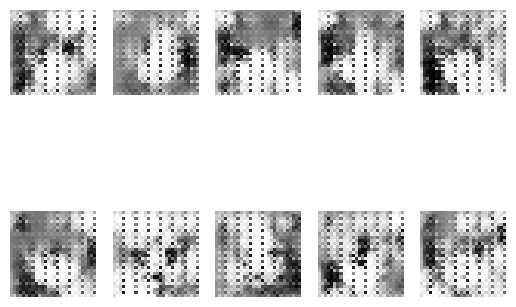

epoch: 8001; G_loss: 1.560354; D_loss: 0.737687


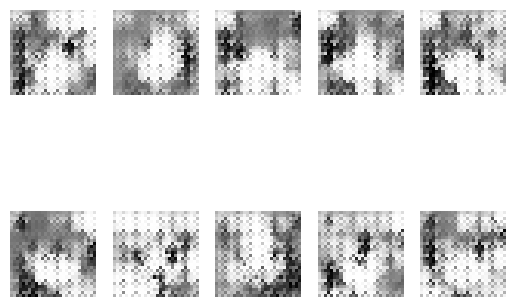

epoch: 8101; G_loss: 1.235366; D_loss: 0.854613


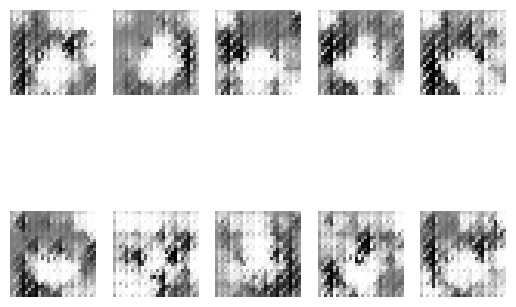

epoch: 8201; G_loss: 1.818224; D_loss: 0.627595


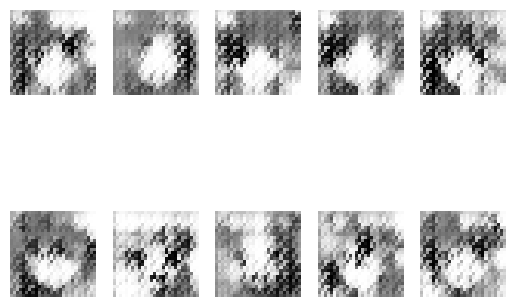

epoch: 8301; G_loss: 1.505603; D_loss: 0.907567


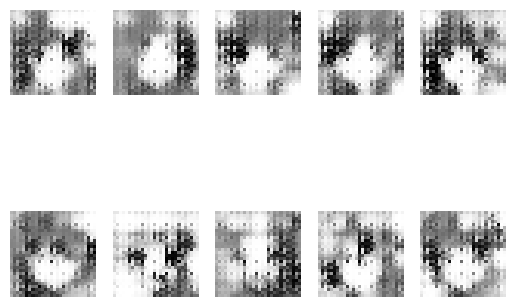

epoch: 8401; G_loss: 0.840776; D_loss: 1.813998


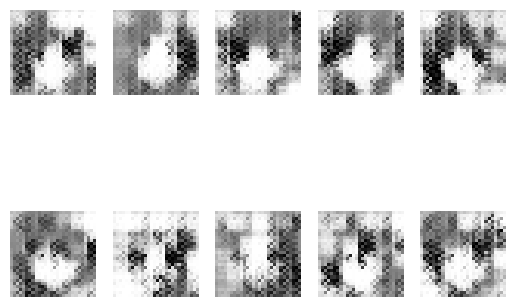

epoch: 8501; G_loss: 0.913313; D_loss: 1.464440


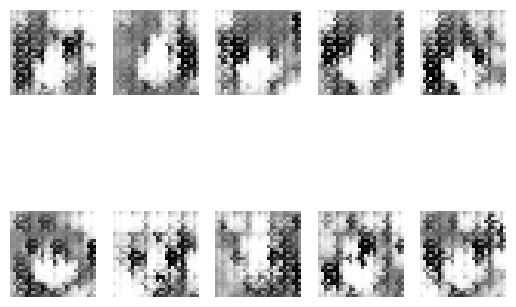

epoch: 8601; G_loss: 1.903618; D_loss: 0.536799


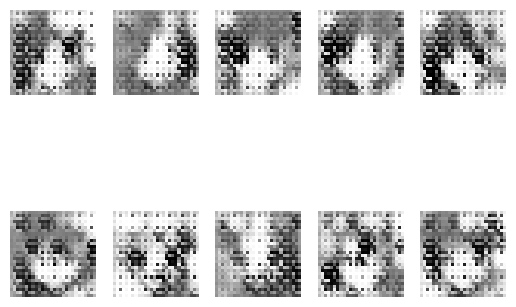

epoch: 8701; G_loss: 1.630779; D_loss: 0.590720


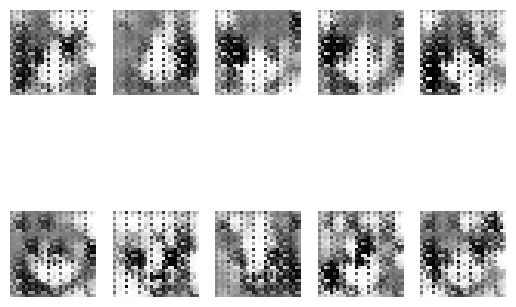

epoch: 8801; G_loss: 0.700976; D_loss: 1.473173


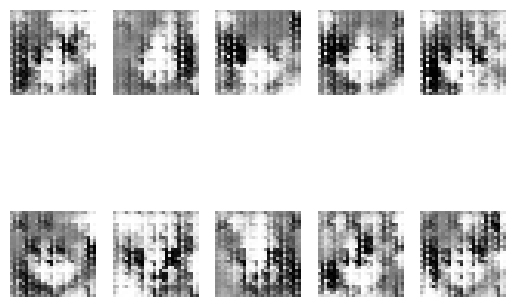

epoch: 8901; G_loss: 1.583157; D_loss: 0.625184


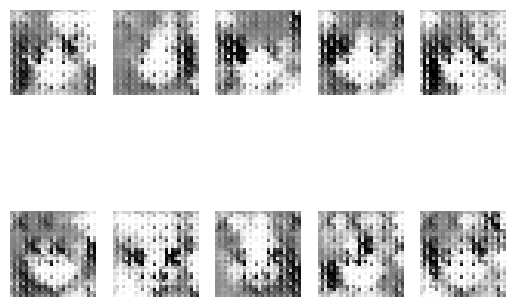

epoch: 9001; G_loss: 0.944414; D_loss: 1.148852


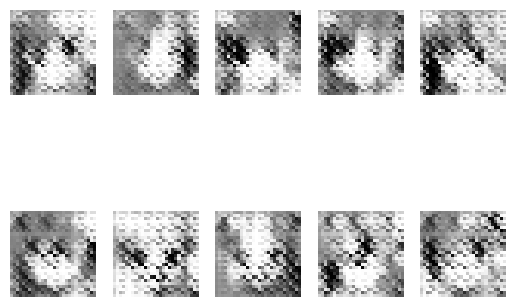

epoch: 9101; G_loss: 1.015922; D_loss: 1.358418


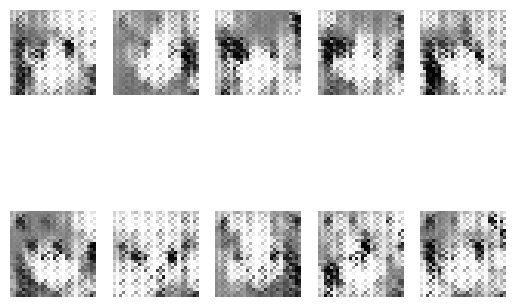

epoch: 9201; G_loss: 1.031875; D_loss: 1.442513


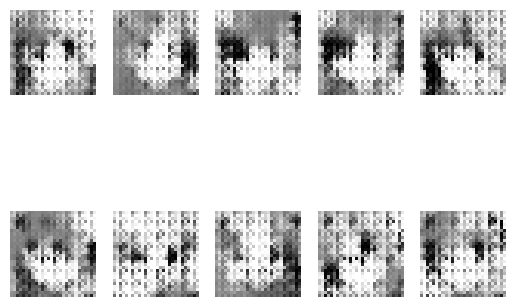

epoch: 9301; G_loss: 1.302193; D_loss: 0.821236


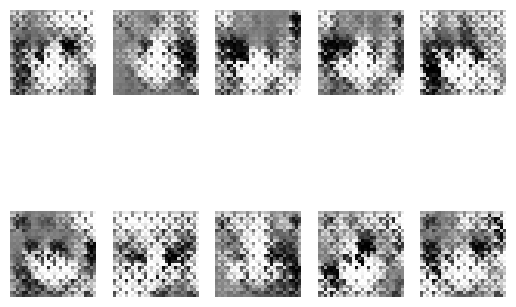

epoch: 9401; G_loss: 1.313111; D_loss: 0.949396


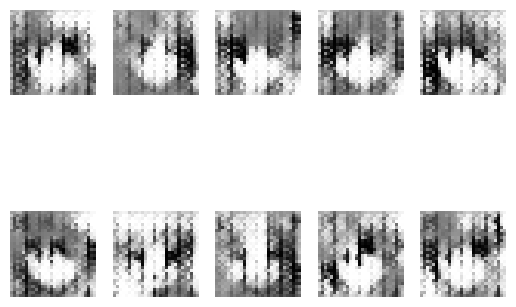

epoch: 9501; G_loss: 1.319897; D_loss: 1.133344


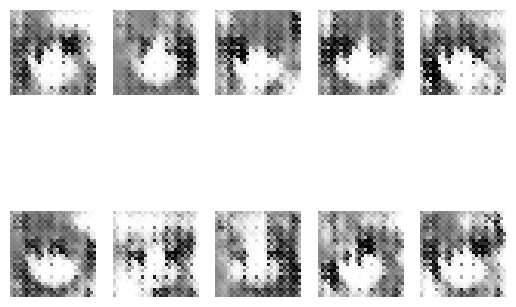

epoch: 9601; G_loss: 1.127047; D_loss: 1.054885


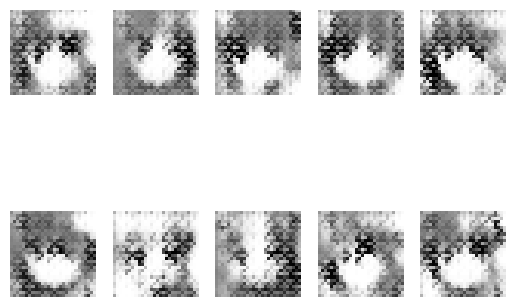

epoch: 9701; G_loss: 0.668996; D_loss: 1.665168


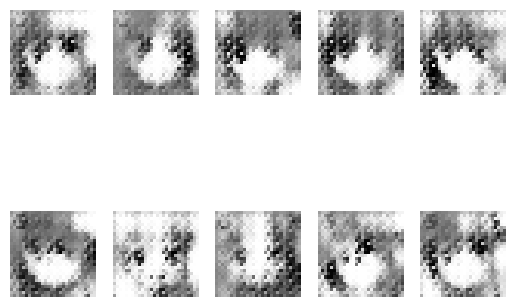

epoch: 9801; G_loss: 0.637147; D_loss: 2.070489


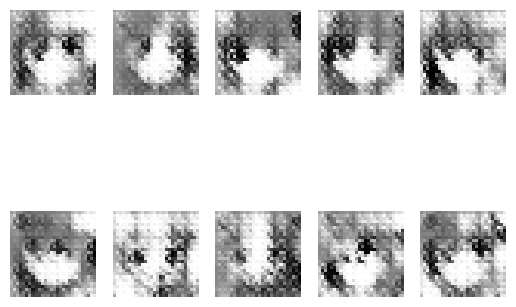

epoch: 9901; G_loss: 1.388140; D_loss: 0.651148


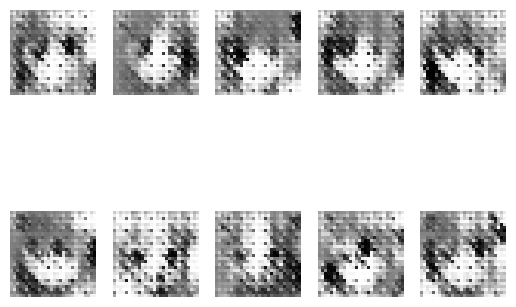

In [14]:
x_train = load_images(dataset_path)
x_train = x_train / 255.0
x_iter = iter(tf.data.Dataset.from_tensor_slices(x_train).shuffle(4 * batch_size).batch(batch_size).repeat())

# Generator
G = tf.keras.models.Sequential([
  tf.keras.layers.Dense(7*7*128, input_shape=(z_dim,), activation='relu'),
  tf.keras.layers.Reshape((7, 7, 128)),
  tf.keras.layers.Conv2DTranspose(64, (3, 3), strides=(2, 2), padding='same', activation='relu'),
  tf.keras.layers.Conv2DTranspose(1, (3, 3), strides=(2, 2), padding='same', activation='sigmoid')])

# Discriminator
D = tf.keras.models.Sequential([
 tf.keras.layers.Conv2D(64, (3, 3), strides=(2, 2), padding='same', input_shape=(28, 28, 1), activation='relu'),
 tf.keras.layers.Conv2D(128, (3, 3), strides=(2, 2), padding='same', activation='relu'),
 tf.keras.layers.Flatten(),
 tf.keras.layers.Dense(1)])

# Loss functions
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits = True)
def G_loss(D, x_fake):
  return cross_entropy(tf.ones_like(D(x_fake)), D(x_fake))
def D_loss(D, x_real, x_fake):
  return cross_entropy(tf.ones_like(D(x_real)), D(x_real)) + cross_entropy(tf.zeros_like(D(x_fake)), D(x_fake))

# Optimizers
G_opt = tf.keras.optimizers.Adam(1e-4)
D_opt = tf.keras.optimizers.Adam(1e-4)

# Train
for epoch in range(epochs):
  z_mb = tf.random.normal([batch_size, z_dim])
  x_real = next(x_iter)
  # Record operations
  with tf.GradientTape() as G_tape, tf.GradientTape() as D_tape:
    x_fake = G(z_mb)
    G_loss_curr = G_loss(D, x_fake)
    D_loss_curr = D_loss(D, x_real, x_fake)
  # Gradients
  G_grad = G_tape.gradient(G_loss_curr, G.trainable_variables)
  D_grad = D_tape.gradient(D_loss_curr, D.trainable_variables)
  # Apply gradients
  G_opt.apply_gradients(zip(G_grad, G.trainable_variables))
  D_opt.apply_gradients(zip(D_grad, D.trainable_variables))

  if epoch % 100 == 0:
    # Print results
    print('epoch: {}; G_loss: {:.6f}; D_loss: {:.6f}'.format(epoch+1, G_loss_curr, D_loss_curr))
    # Plot generated images
    generated_images = G(z_vis)
    for i in range(10):
      plt.subplot(2, 5, i+1)
      plt.imshow(generated_images[i,:,:,0]*255.0, cmap='gray')  # Display grayscale images
      plt.axis('off')
    plt.show()
